# Chủ đề: Phân loại thời tiết

Nhóm 9:

- Nguyễn Ngọc Hải	Haui-2022605947

- Nguyễn Thành Công	Haui-2022606702 

- Vũ Minh Đức	11221425

- Nguyễn Hoàng Nguyên	11224818

- Nguyễn Trọng Vỹ	11227025

# Giới thiệu bài toán

- Bộ dữ liệu này được tạo tổng hợp để mô phỏng dữ liệu thời tiết cho các tác vụ phân loại. Nó bao gồm nhiều đặc điểm liên quan đến thời tiết và phân loại thời tiết thành bốn loại: Mưa, Nắng, Mây và Tuyết. Bộ dữ liệu này được thiết kế để thực hành các thuật toán phân loại, tiền xử lý dữ liệu và các phương pháp phát hiện ngoại lệ. 

- Với các đặc trưng:

    - Temperature (numeric): Nhiệt độ tính bằng độ C, từ cực lạnh đến cực nóng.

    - Humidity (numeric): Phần trăm độ ẩm, bao gồm các giá trị trên 100% để đưa ra các giá trị ngoại lệ.

    - Wind Speed (numeric): Tốc độ gió tính bằng kilômét trên giờ, có phạm vi bao gồm các giá trị cao không thực tế.

    - Precipitation(%) (numeric): Tỷ lệ phần trăm lượng mưa, bao gồm các giá trị ngoại lệ.

    - Cloud Cover (categorical): Mô tả độ che phủ của mây.

    - Atmospheric Pressure (numeric): Áp suất khí quyển tính bằng hPa, bao phủ một phạm vi rộng.

    - UV Index (numeric): Chỉ số UV, biểu thị cường độ bức xạ cực tím.

    - Season (categorical): Mùa mà dữ liệu được ghi lại.

    - Visibility(km) (numeric): Tầm nhìn tính bằng kilômét, bao gồm các giá trị rất thấp hoặc rất cao.

    - Location (categorical): Loại vị trí nơi dữ liệu được ghi lại.

    - Weather Type (categorical): Biến mục tiêu để phân loại, chỉ ra loại thời tiết.

- Nguồn dữ liệu: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data

- Mục tiêu: Đánh giá các model và tìm ra model hoạt động tốt nhất với dữ liệu bài toán phân loại thời tiết và demo trên streamlit tạo lên 1 hệ thống hoàn thiện có thể đem lại trải nghiệm cho người dùng với dữ liệu thực.

# Import thư viện

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lazypredict.Supervised import LazyClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import pickle

# khám phá dữ liệu

In [10]:
df =  pd.read_csv('weather_classification_data.csv')
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [12]:
print("Information : \n")
print(df.info())

Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None


In [14]:
print("\nMissing Values : \n")
print(df.isnull().sum())


Missing Values : 

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [16]:
# Duplicate Entries
print("\nDuplicate Entries : \n")
print(df.duplicated().sum())


Duplicate Entries : 

0


In [18]:
print("\nLabels : \n")
print(df['Weather Type'].unique())


Labels : 

['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [20]:
print("Describe : \n")
print(df.describe())

Describe : 

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3

# Trực quan hoá dữ liệu

### Phân phối biến mục tiêu

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


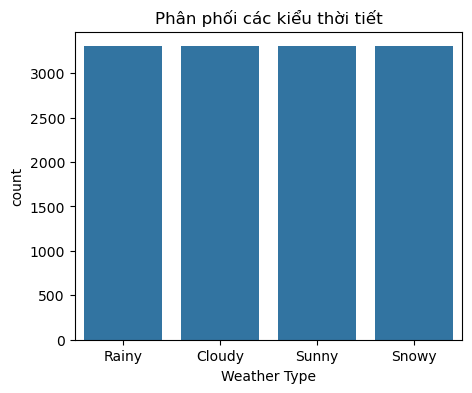

In [24]:
print(df["Weather Type"].value_counts())
plt.figure(figsize=(5, 4))
sns.countplot(x='Weather Type', data=df)
plt.title("Phân phối các kiểu thời tiết")
plt.show()

### Phân phối các biến numerical

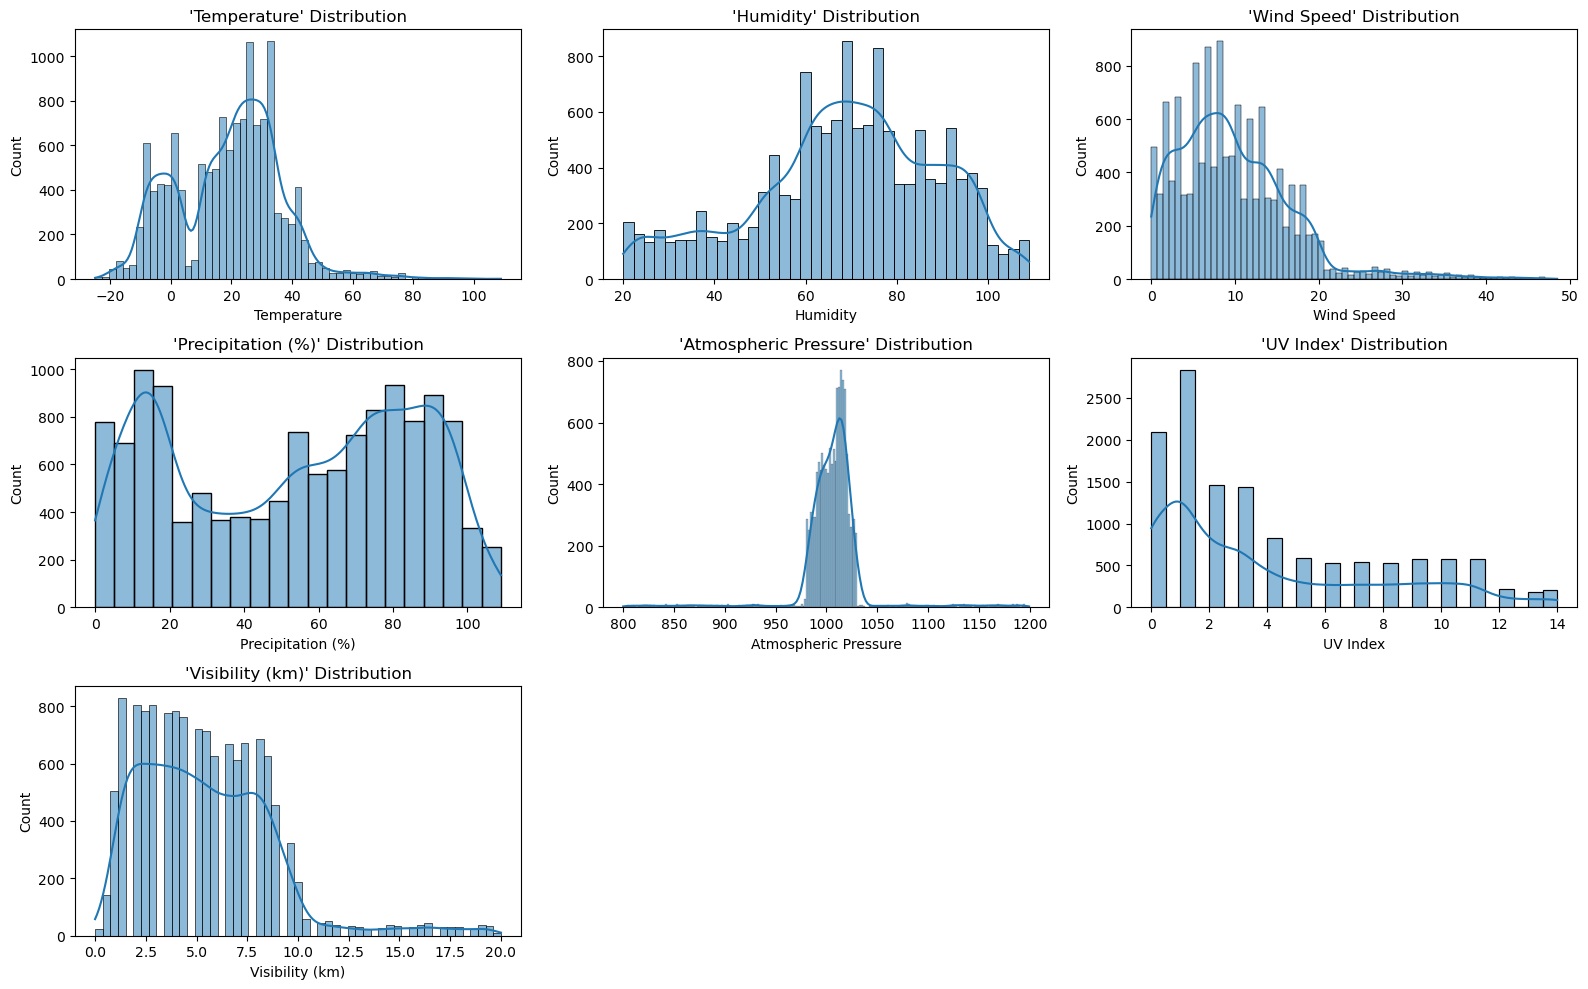

In [27]:
plt.figure(figsize=(16,10))

n = 0
for col in ['Temperature','Humidity','Wind Speed','Precipitation (%)','Atmospheric Pressure','UV Index', 'Visibility (km)']:
    n=n+1
    plt.subplot(3,3,n)
    sns.histplot(data = df, x = col, kde=True)
    plt.title(f"'{col}' Distribution")
plt.tight_layout()
plt.show()

- Nhiệt độ → Hơi lệch phải (có giá trị ngoại lai) → Một số giá trị lạnh/nóng cực đoan.

- Độ ẩm → Phân phối bình thường → Phân bố đều trong khoảng.

- Tốc độ gió → Lệch phải (có giá trị ngoại lai) → Hầu hết các ngày có gió nhẹ đến vừa phải.

- Lượng mưa (%) → Phân phối đồng đều → Tất cả các mức độ mưa xảy ra đều.

- Áp suất khí quyển → Cả lệch phải và lệch trái (có giá trị ngoại lai) → Một số ngày có áp suất cao/thấp bất thường.

- Chỉ số UV → Hơi lệch phải (có giá trị ngoại lai) → Nhiều ngày có chỉ số UV thấp đến vừa phải hơn là chỉ số UV cực đoan.

- Tầm nhìn (km) → Lệch phải (có giá trị ngoại lai) → Hầu hết các ngày có tầm nhìn tốt, ít ngày có tầm nhìn kém.

### Count plot các biến categorical

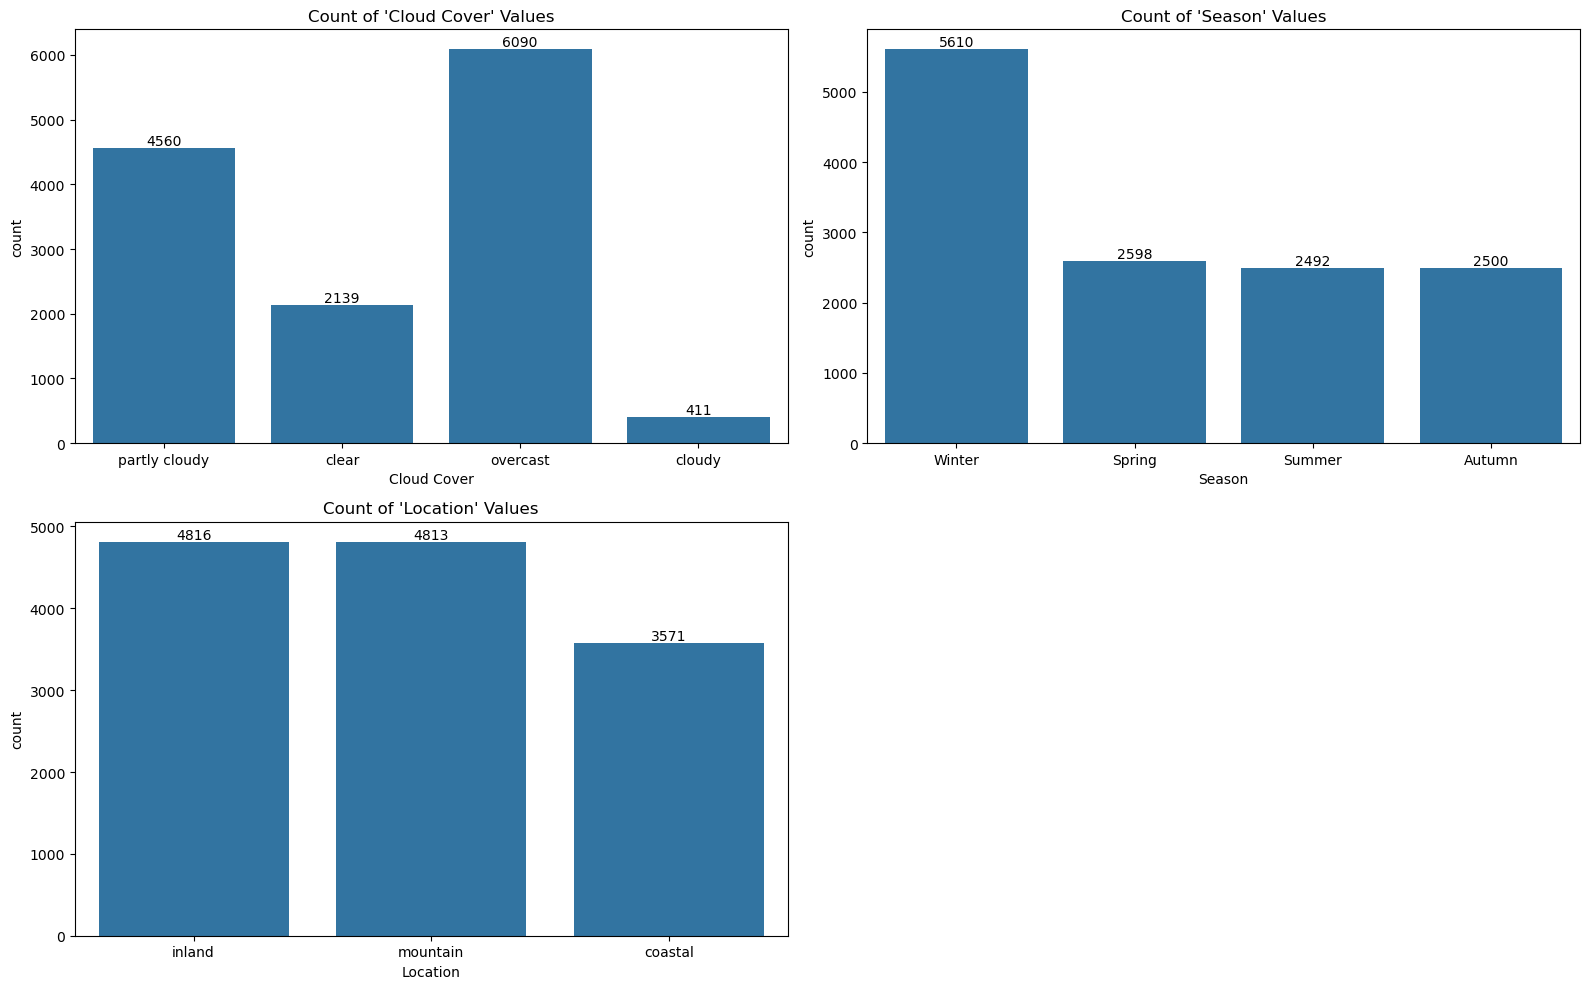

In [30]:
plt.figure(figsize=(16,10))

n=0
for col in ['Cloud Cover','Season','Location']:
    n=n+1
    plt.subplot(2,2,n)
    ax = sns.countplot(data=df,x=col)
    plt.title(f"Count of '{col}' Values")

    for c in ax.containers:
        ax.bar_label(c,fmt='%d')

plt.tight_layout()
plt.show()

- Cloud Cover: Thời tiết nhiều mây là điều kiện mây thường gặp nhất, trong khi "Nhiều mây" thì hiếm.  

- Season: Mùa đông chiếm ưu thế trong tập dữ liệu, trong khi các mùa khác gần như cân bằng. 
 
- Location: Các vị trí nội địa và miền núi gần như bằng nhau; khu vực ven biển thì hơi ít được đại diện hơn.

## Biểu đồ phân bố dữ liệu theo tứ phân vị

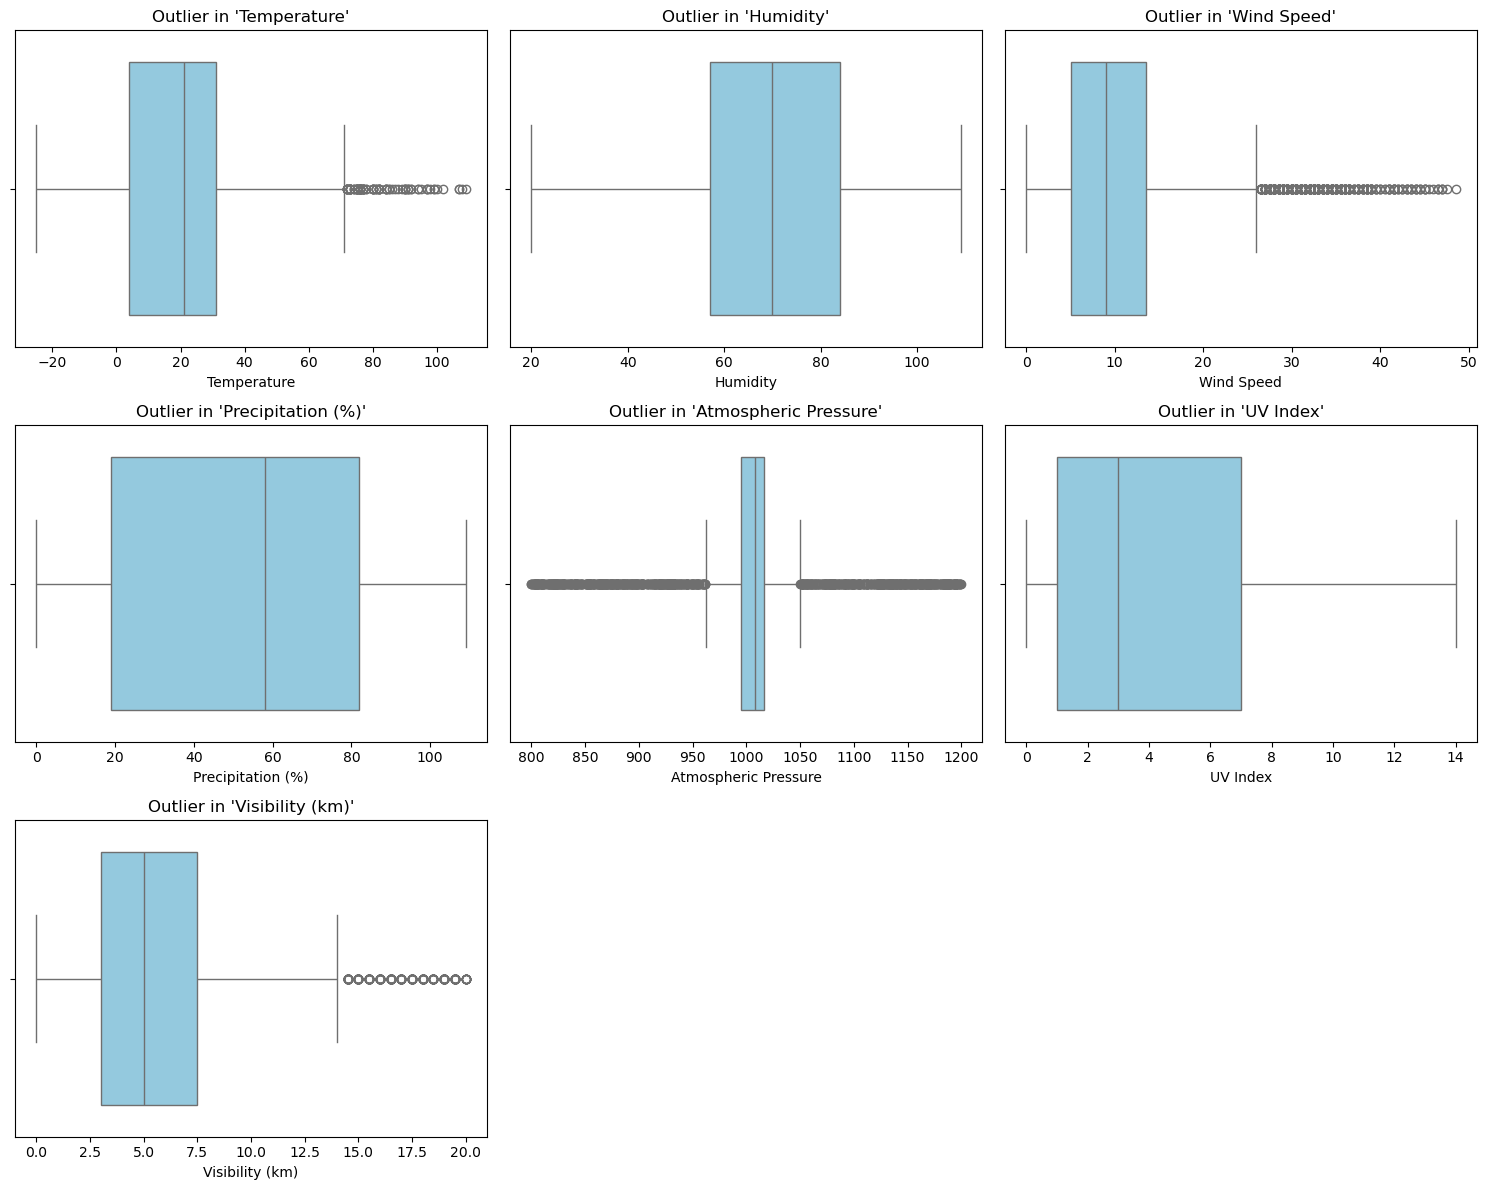

In [35]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


n_cols = 3  
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Outlier in '{col}'", fontsize=12)

plt.tight_layout()
plt.show()

Nhận xét

- Một số outlier là hợp lý về mặt vật lý (ví dụ: gió mạnh, mưa cực lớn, tầm nhìn thấp).

- Một số outlier bất hợp lý về vật lý (nhiệt độ 100°C, độ ẩm >100%, UV Index > 14), nhiều khả năng là do lỗi cảm biến hoặc nhập dữ liệu.

- Nếu mục tiêu là huấn luyện mô hình dự báo thời tiết bình thường, cần loại bỏ hoặc xử lý các outlier phi thực tế.

- Nếu mục tiêu là phân tích cực đoan thời tiết, nên giữ lại nhưng phải gắn cờ các điểm này để xử lý riêng.

## Biểu đồ tương quan

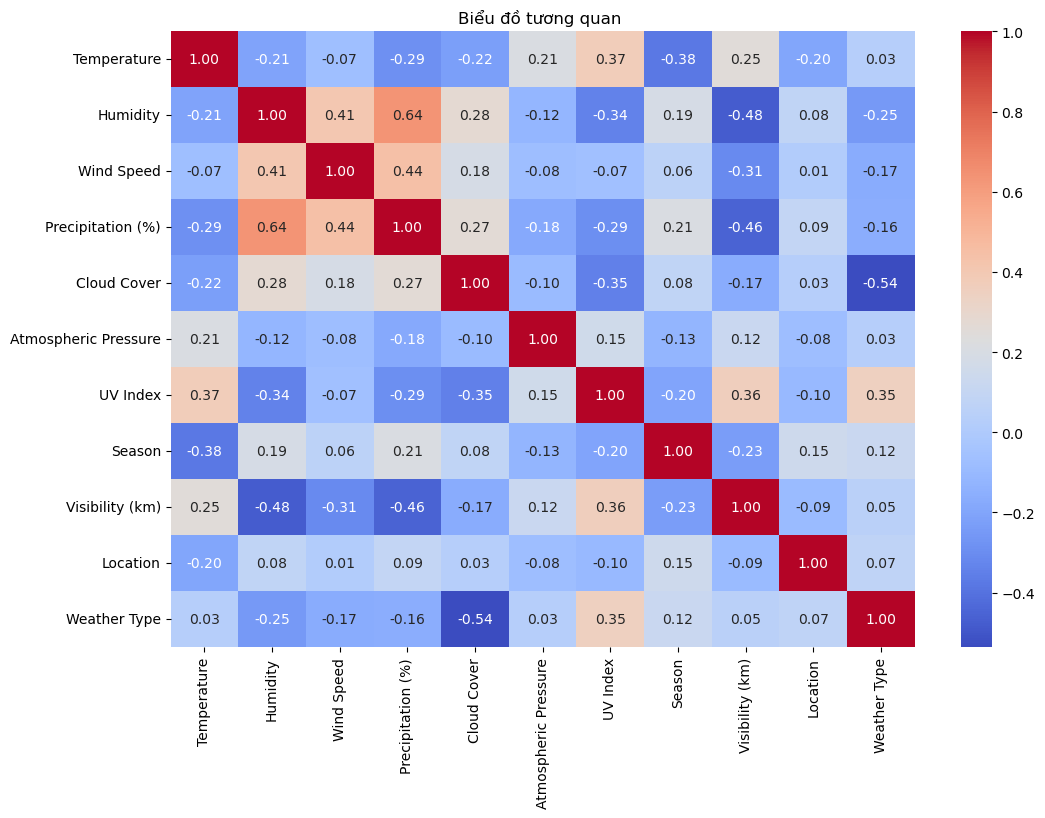

In [39]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Biểu đồ tương quan ")
plt.show()

Mối tương quan mạnh (dương):

- Humidity ↔ Precipitation (%) (0.64) → Độ ẩm cao thường đi kèm lượng mưa lớn.

- Wind Speed ↔ Precipitation (%) (0.44) → Gió mạnh thường xuất hiện khi có mưa hoặc thời tiết xấu.

- Temperature ↔ UV Index (0.37) → Nhiệt độ cao thường trùng với mức UV cao, đặc trưng cho ngày nắng.

- UV Index ↔ Visibility (km) (0.36) → Trời quang (tầm nhìn xa) thường đi kèm chỉ số UV cao.

- UV Index ↔ Weather Type (0.35) → Loại thời tiết có liên hệ nhất định với mức UV.

Mối tương quan mạnh (âm):

- Cloud Cover ↔ Weather Type (-0.54) → Thời tiết nhiều mây thường liên quan đến loại thời tiết ít nắng hơn.

- Humidity ↔ Visibility (km) (-0.48) → Độ ẩm cao làm giảm tầm nhìn (do mây mù, sương hoặc mưa).

- Precipitation (%) ↔ Visibility (km) (-0.46) → Mưa nhiều làm giảm tầm nhìn rõ rệt.

- Humidity ↔ UV Index (-0.34) → Trời ẩm ướt thường đi kèm mức UV thấp.

Mối tương quan yếu:

- Các cặp như Temperature ↔ Wind Speed (-0.07) hoặc Atmospheric Pressure với hầu hết biến (|r| < 0.2) cho thấy mối quan hệ rất yếu.

- Location hầu như không liên quan đến các thông số khí tượng (|r| gần 0).

Ý nghĩa tổng quát

- Bộ dữ liệu phản ánh khá đúng quy luật khí tượng: độ ẩm và mưa gắn chặt với nhau, mưa và độ ẩm cao làm giảm tầm nhìn, và ngày nắng thường có nhiệt độ và UV cao.

- Áp suất khí quyển và vị trí đo không thể hiện mối quan hệ tuyến tính mạnh với các biến khác trong tập dữ liệu.



# BaggingClassifier(Nguyễn Ngọc Hải)

## Xử lí dữ liệu

### Loại bỏ các outlier

In [11]:
print(f"Số dòng trước khi xử lý outlier: {len(df)}")

def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    print(f"{column}: khoảng [{lower_bound:.2f}, {upper_bound:.2f}] (Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f})")
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Xử lý cho tất cả cột số (trừ cột cuối)
numeric_columns = df.select_dtypes(include=['number']).columns[:-1]  
for column in numeric_columns:
    df = handle_outliers_iqr(df, column=column)

# Reset index
df = df.reset_index(drop=True)
print(f"Số dòng sau khi xử lý outlier: {len(df)}")


Số dòng trước khi xử lý outlier: 13200
Temperature: khoảng [-36.50, 71.50] (Q1=4.00, Q3=31.00, IQR=27.00)
Humidity: khoảng [18.00, 122.00] (Q1=57.00, Q3=83.00, IQR=26.00)
Wind Speed: khoảng [-7.75, 26.25] (Q1=5.00, Q3=13.50, IQR=8.50)
Precipitation (%): khoảng [-72.50, 171.50] (Q1=19.00, Q3=80.00, IQR=61.00)
Atmospheric Pressure: khoảng [961.86, 1049.87] (Q1=994.87, Q3=1016.87, IQR=22.00)
UV Index: khoảng [-6.50, 13.50] (Q1=1.00, Q3=6.00, IQR=5.00)
Số dòng sau khi xử lý outlier: 11673


### Phân chia dữ liệu

In [12]:
target = "Weather Type"
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           11673 non-null  float64
 1   Humidity              11673 non-null  int64  
 2   Wind Speed            11673 non-null  float64
 3   Precipitation (%)     11673 non-null  float64
 4   Cloud Cover           11673 non-null  object 
 5   Atmospheric Pressure  11673 non-null  float64
 6   UV Index              11673 non-null  int64  
 7   Season                11673 non-null  object 
 8   Visibility (km)       11673 non-null  float64
 9   Location              11673 non-null  object 
 10  Weather Type          11673 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1003.3+ KB


### Xử lí 1000 dòng đầu dữ liệu

In [5]:

dfs = df.head(1000)


numeric_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                    'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
categorical_features = ['Cloud Cover', 'Season', 'Location']
target = 'Weather Type'


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

X1 = dfs.drop(columns=[target])
y1 = dfs[target]

# Chia train/test
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

# Áp dụng tiền xử lý
X1_train_processed = preprocessor.fit_transform(X1_train)
X1_test_processed = preprocessor.transform(X1_test)

## Chọn model và chọn tham số huấn luyện

### Chọn model

In [6]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X1_train_processed, X1_test_processed, y1_train, y1_test)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 17
[LightGBM] [Info] Start training from score -1.401408
[LightGBM] [Info] Start training from score -1.323320
[LightGBM] [Info] Start training from score -1.437588
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [7]:
d = pd.DataFrame(models).sort_values("Accuracy",ascending=False)
print(d)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.95               0.96    None      0.95   
BaggingClassifier                  0.94               0.95    None      0.95   
RandomForestClassifier             0.94               0.95    None      0.95   
ExtraTreesClassifier               0.94               0.95    None      0.95   
SVC                                0.94               0.94    None      0.94   
DecisionTreeClassifier             0.94               0.93    None      0.93   
LogisticRegression                 0.93               0.92    None      0.93   
BernoulliNB                        0.92               0.92    None      0.91   
NuSVC                              0.91               0.91    None      0.91   
LinearSVC                          0.91               0.91    None      0.91   
LinearDiscriminantAnalysis         0.91 

Chọn BaggingClassifier theo Accuracy (0.94) là vì:

- Hiệu suất gần tương đương với mô hình tốt nhất (LGBM = 0.95).

- Balanced Accuracy và F1 Score đều rất cao (0.95).

- Đơn giản, dễ huấn luyện, giảm overfitting với DecisionTree.

### Chọn tham số và huấn luyện

In [ ]:
print(df.info())

# 1. Tách dữ liệu
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Pipeline với BaggingClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

# 3. Tham số để RandomizedSearchCV thử nghiệm
param_dist = {
    'classifier__n_estimators': randint(10, 200),       # số lượng cây con
    'classifier__max_samples': uniform(0.5, 0.5),       # tỷ lệ mẫu bootstrap (0.5 → 1.0)
    'classifier__max_features': uniform(0.5, 0.5),      # tỷ lệ đặc trưng (0.5 → 1.0)
    'classifier__estimator__max_depth': [None] + list(range(3, 21)),  
    'classifier__estimator__min_samples_split': randint(2, 20),
    'classifier__estimator__min_samples_leaf': randint(1, 10)
}

# 4. RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=50,        
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("🔍 RandomizedSearchCV Best parameters:", random_search.best_params_)
print("🔍 RandomizedSearchCV Best CV Accuracy:", random_search.best_score_)

# 5. Sinh param_grid quanh best_params để GridSearch tinh chỉnh
best_params = random_search.best_params_
param_grid = {}

for key, value in best_params.items():
    if isinstance(value, int):
        param_grid[key] = [v for v in [value-1, value, value+1] if v > 0]
    elif isinstance(value, float):
        param_grid[key] = [max(0.1, value-0.1), value, min(1.0, value+0.1)]
    elif value is None:
        param_grid[key] = [None]
    else:
        param_grid[key] = [value]

print("🎯 Param grid for GridSearch:", param_grid)

# 6. GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("🏆 GridSearchCV Best parameters:", grid_search.best_params_)
print("🏆 GridSearchCV Best CV Accuracy:", grid_search.best_score_)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           11673 non-null  float64
 1   Humidity              11673 non-null  int64  
 2   Wind Speed            11673 non-null  float64
 3   Precipitation (%)     11673 non-null  float64
 4   Cloud Cover           11673 non-null  object 
 5   Atmospheric Pressure  11673 non-null  float64
 6   UV Index              11673 non-null  int64  
 7   Season                11673 non-null  object 
 8   Visibility (km)       11673 non-null  float64
 9   Location              11673 non-null  object 
 10  Weather Type          11673 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1003.3+ KB
None
🔍 RandomizedSearchCV Best parameters: {'classifier__estimator__max_depth': None, 'classifier__estimator__min_samples_leaf': 3, 'classifier__estimator__min_sam

## Đánh giá và nhận xét

### Đánh giá

✅ Test Accuracy: 0.9678800856531049

Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.93      0.98      0.95       596
       Rainy       0.97      0.96      0.96       563
       Snowy       0.99      0.98      0.98       563
       Sunny       0.99      0.96      0.97       613

    accuracy                           0.97      2335
   macro avg       0.97      0.97      0.97      2335
weighted avg       0.97      0.97      0.97      2335



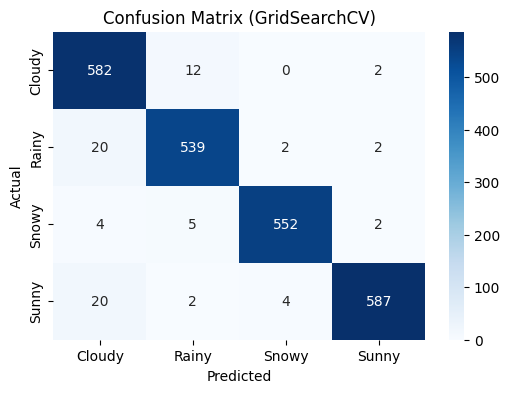

In [23]:
y_pred = grid_search.predict(X_test)
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = sorted(y.unique())

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (GridSearchCV)")
plt.show()

### Nhận xét

Độ chính xác tổng thể

- Accuracy ≈ 96.78%, rất cao cho một mô hình phân loại 4 lớp (Cloudy, Rainy, Snowy, Sunny).

- Macro và weighted average của precision, recall, F1-score đều xấp xỉ 0.97, cho thấy mô hình khá cân bằng giữa các lớp, không bị lệch nhiều về lớp nào.

Nhận xét từ Confusion Matrix

- Nhầm lẫn nhiều nhất xảy ra giữa Cloudy ↔ Rainy và Cloudy ↔ Sunny.
→ Có thể vì ảnh Cloudy dễ gây nhầm lẫn khi trời nhiều mây nhưng cũng sáng (giống Sunny) hoặc mây kèm mưa (giống Rainy).

- Snowy ít nhầm nhất → đặc trưng tuyết khá rõ ràng, mô hình phân biệt dễ dàng.

Kết luận

- Mô hình hoạt động rất tốt với độ chính xác cao.

- Điểm hạn chế chính là việc phân biệt Cloudy với Rainy và Sunny.

- Cải thiện với model khác hoặc xử lí dữ liệu tốt hơn

# LightGBM Classifier (Nguyễn Trọng Vỹ)

## Lí do lựa chọn:

- Xử lý tốt dữ liệu dạng hỗn hợp (numeric + categorical)

- Hiệu suất cao & tốc độ nhanh

- Khả năng mô hình hóa quan hệ phi tuyến

- Khả năng điều chỉnh linh hoạt

## Xử lí dữ liệu

In [ ]:
df_lgbm =  pd.read_csv('weather_classification_data.csv')
numeric_columns = df_lgbm.select_dtypes(include=["number"]).columns
print(f"Số dòng trước khi xử lý outlier: {len(df_lgbm)}")
def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the function to all numeric columns
for column in numeric_columns:
    df_lgbm = handle_outliers_iqr(df_lgbm, column=column)

# Reset the index after removing outliers
df_lgbm = df_lgbm.reset_index(drop=True)
print(f"Số dòng sau khi xử lý outlier: {len(df_lgbm)}")

Số dòng trước khi xử lý outlier: 13200
Số dòng sau khi xử lý outlier: 11586


In [3]:
categorical_cols = df_lgbm.select_dtypes(include='object').columns[:-1]
for col in categorical_cols:
    df_lgbm[col] = df_lgbm[col].astype('category')
target = 'Weather Type'

X_lgbm = df_lgbm.drop(columns=[target])
y_lgbm = df_lgbm[target]

#chia train, test
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X_lgbm, y_lgbm, test_size=0.2,random_state=42, stratify=y_lgbm)

## Lựa chọn tham số và huấn luyện

### Dùng RandomizedSearchCV

In [7]:
lgbm = LGBMClassifier(random_state=42)
#khai báo phạm vi tham số cần tìm
param_random_lgbm = {
    'num_leaves': np.arange(20, 100, 10),            # số lá
    'max_depth': np.arange(3, 15, 1),                # độ sâu
    'learning_rate': np.linspace(0.01, 0.2, 10),     # tốc độ học
    'n_estimators': np.arange(100, 1000, 100),       # số cây
    'subsample': np.linspace(0.6, 1.0, 5),           # tỷ lệ mẫu
    'colsample_bytree': np.linspace(0.6, 1.0, 5)     # tỷ lệ cột
}

#thiết lập random search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_random_lgbm,
    n_iter=50,               # số lần thử ngẫu nhiên
    scoring='accuracy',      # tiêu chí đánh giá
    cv=5,                    # k-fold cross validation
    random_state=42,
    verbose=1,
    n_jobs=-1                # chạy song song
)
random_search.fit(X_train_lgbm, y_train_lgbm)
random_search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 9268, number of used features: 10
[LightGBM] [Info] Start training from score -1.364522
[LightGBM] [Info] Start training from score -1.416527
[LightGBM] [Info] Start training from score -1.393658
[LightGBM] [Info] Start training from score -1.371302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

{'subsample': np.float64(0.7),
 'num_leaves': np.int64(30),
 'n_estimators': np.int64(100),
 'max_depth': np.int64(5),
 'learning_rate': np.float64(0.07333333333333333),
 'colsample_bytree': np.float64(0.7)}

### Dùng GridSearchCV

In [8]:
#tạo tham số grid xung quanh tham số tốt nhất của randomSearch
param_grid_lgbm = {
    'num_leaves': [25, 30, 35],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.06, 0.073, 0.08],
    'n_estimators': [50, 100, 150],
    'subsample': [0.65, 0.7, 0.75],      
    'colsample_bytree': [0.65, 0.7, 0.75]
}

#thiết lập grid search
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    scoring='accuracy',   
    cv=5,
    verbose=1,
    n_jobs=-1 
)

### Huấn luyện

In [10]:
grid_search.fit(X_train_lgbm, y_train_lgbm)
grid_search.best_params_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 9268, number of used features: 10
[LightGBM] [Info] Start training from score -1.364522
[LightGBM] [Info] Start training from score -1.416527
[LightGBM] [Info] Start training from score -1.393658
[LightGBM] [Info] Start training from score -1.371302


{'colsample_bytree': 0.65,
 'learning_rate': 0.06,
 'max_depth': -1,
 'n_estimators': 150,
 'num_leaves': 30,
 'subsample': 0.65}

## Đánh giá và nhận xét

### Đánh giá

In [11]:
best_model_grid = grid_search.best_estimator_
best_model_random = random_search.best_estimator_

# Dự đoán trên tập test
y_pred_lgbm_random = best_model_random.predict(X_test_lgbm)
# Dự đoán trên tập test
y_pred_lgbm_grid = best_model_grid.predict(X_test_lgbm)
print("Test Accuracy:", accuracy_score(y_test_lgbm, y_pred_lgbm_grid))

Test Accuracy: 0.9723899913718723


✅ Test Accuracy: 0.9749784296807593

Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.95      0.98      0.96       592
       Rainy       0.98      0.97      0.98       562
       Snowy       0.99      0.98      0.99       575
       Sunny       0.98      0.97      0.97       589

    accuracy                           0.97      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.97      0.98      2318



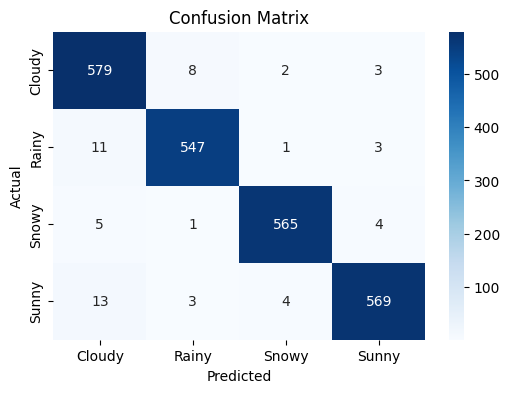

In [13]:
print("✅ Test Accuracy:", accuracy_score(y_test_lgbm, y_pred_lgbm_random))
print("\nClassification Report:\n", classification_report(y_test_lgbm, y_pred_lgbm_random))
cm = confusion_matrix(y_test_lgbm, y_pred_lgbm_random)
class_names = sorted(y_lgbm.unique())  # Lấy tên các lớp

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Nhận Xét
1. Độ chính xác cao:

- Accuracy tổng thể đạt 97%, cho thấy mô hình dự đoán thời tiết rất tốt trên tập kiểm tra.

2. Hiệu suất từng lớp:

- Cloudy: Precision 0.95, Recall 0.98 → Mô hình hơi thiên về dự đoán “Cloudy” đúng.

- Rainy: Precision 0.98, Recall 0.97 → Rất cân bằng giữa dự đoán và thực tế.

- Snowy: Precision 0.99, Recall 0.98 → Dự đoán rất chính xác, gần như không nhầm lẫn.

- Sunny: Precision 0.98, Recall 0.97 → Cũng dự đoán tốt, ít nhầm lẫn.

3. Confusion Matrix:

- Số lượng nhầm lẫn là rất nhỏ. Ví dụ:

    - Cloudy bị nhầm thành Rainy: 8 lần.

    - Sunny bị nhầm thành Cloudy: 13 lần.

- Điều này cho thấy mô hình học được các đặc trưng riêng biệt của từng loại thời tiết rất tốt.

4. Kết luận tổng quan:

- Mô hình LGBMClassifier phù hợp với bài toán phân loại thời tiết.

- Tỷ lệ nhầm lẫn thấp và f1-score cao (0.96–0.99) cho thấy mô hình ổn định và đáng tin cậy cho các dự đoán mới.

# KNN (Nguyễn Hoàng Nguyên)

## Lý do lựa chọn

Với 13.200 bản ghi và 10 đặc trưng, dữ liệu của chúng tôi có quy mô và số chiều vừa phải, phù hợp để áp dụng thuật toán KNN. Thuật toán này không yêu cầu giả định phân phối dữ liệu, xử lý tốt bài toán phân loại đa lớp và dễ tối ưu tham số, từ đó mang lại hiệu quả cao cho bài toán dự đoán kiểu thời tiết.

## Xử lý dữ liệu

### Xử lí outlier

In [34]:
print(f"Số dòng trước khi xử lý outlier: {len(df)}")
def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the function to all numeric columns except the last column
numeric_columns = df.select_dtypes(include=['number']).columns[:-1]  # Exclude the last column
for column in numeric_columns:
    df = handle_outliers_iqr(df, column=column)

# Reset the index after removing outliers
df = df.reset_index(drop=True)
print(f"Số dòng sau khi xử lý outlier: {len(df)}")  

Số dòng trước khi xử lý outlier: 11673
Số dòng sau khi xử lý outlier: 11531


### Phân chia xác định dữ liệu

In [35]:
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Xác định các cột số và cột phân loại
num_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
            'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
cat_cols = ['Cloud Cover', 'Season', 'Location']

# Tiền xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

## Chọn tham số và huấn luyện

### Chọn tham số

In [36]:
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

# Lưới tham số để tìm kiếm
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# Grid Search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

### Huấn luyện

In [37]:
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)

Best params: {'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'uniform'}


## Đánh giá và nhận xét

### Đánh giá

✅ Test Accuracy: 0.952752492414391
=== Classification Report ===
              precision    recall  f1-score   support

      Cloudy       0.93      0.93      0.93       629
       Rainy       0.92      0.95      0.94       562
       Snowy       0.98      0.98      0.98       589
       Sunny       0.98      0.95      0.97       527

    accuracy                           0.95      2307
   macro avg       0.95      0.95      0.95      2307
weighted avg       0.95      0.95      0.95      2307



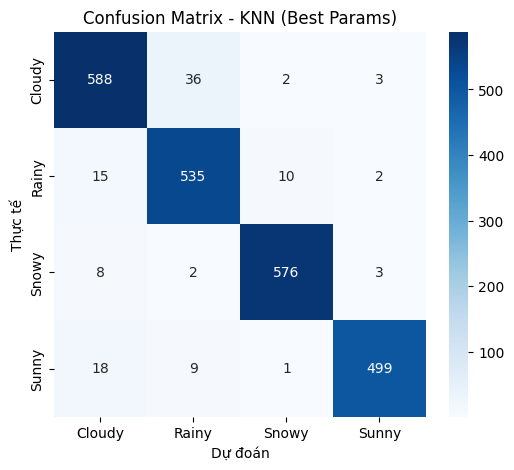

In [38]:
# Dự đoán với mô hình tối ưu
y_pred = grid_search.predict(X_test)

# 1. Classification Report
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_search.classes_,
            yticklabels=grid_search.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix - KNN (Best Params)')
plt.show()

### Nhận xét

Classification Report: 

  - Precision, Recall, F1-score của các lớp đều cao và khá cân bằng. 

  - Lớp **Snowy** đạt độ nhận diện gần như hoàn hảo (Precision 0.97, Recall 0.99, F1-score 0.98). 

  - Lớp **Cloudy** và **Rainy** có hiệu suất tốt nhưng vẫn tồn tại nhầm lẫn qua lại.  

  - Lớp **Sunny** đạt hiệu suất cao, ít bị nhầm sang các lớp khác.  

Confusion Matrix:

  - Phần lớn các mẫu được dự đoán đúng, thể hiện các ô chéo chính có giá trị cao.  

  - Một số lỗi dự đoán chủ yếu xuất hiện giữa **Cloudy** ↔ **Rainy** do đặc trưng thời tiết hai lớp tương đối giống nhau.  
  
  - Các lớp **Sunny** và **Snowy** hầu như không bị nhầm lẫn nhiều.  

Mô hình hiện tại đã cho kết quả **ổn định và chính xác cao**, đủ khả năng áp dụng cho bài toán phân loại thời tiết.

# Random Forest (Nguyễn Thành Công)

## Lý do lựa chọn

- Xử lý tốt dữ liệu nhiều đặc trưng và có nhiễu: Random Forest chọn đặc trưng ngẫu nhiên cho mỗi cây, giảm tác động của feature không quan trọng.

- Phù hợp với quan hệ phi tuyến: Các yếu tố thời tiết có mối quan hệ phức tạp, mô hình cây quyết định xử lý tốt mà không cần giả định tuyến tính.

- Ít nhạy cảm với outlier: Do sử dụng nhiều cây, ảnh hưởng của giá trị ngoại lai giảm đáng kể.

- Cung cấp đánh giá tầm quan trọng của đặc trưng(feature importance): Giúp xác định yếu tố ảnh hưởng mạnh nhất đến biến mục tiêu.

- Hiệu suất cao và ổn định: Kết hợp nhiều cây giúp giảm overfitting, tăng khả năng tổng quát, mô hình được đánh giá cao nhất với bộ dữ liệu khi chạy trên Pycaret.

## Xử lý dữ liệu

### Loại bỏ các outlier
- Không loại bỏ toàn bộ outlier ở tất cả các đặc trưng numerical vì có thể làm mất nhiều dữ liệu và loại bỏ các giá trị hợp lệ (ví dụ hiện tượng thời tiết cực đoan). Chỉ loại bỏ ở những đặc trưng có phân phối lệch mạnh và giá trị bất thường rõ rệt để giảm nhiễu nhưng vẫn giữ kích thước mẫu đủ lớn.

In [13]:
def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

dfRF = df.copy()

# Các cột cần loại outlier
cols_to_clean = ['Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']

# Gọi hàm
dfRF = handle_outliers_iqr(dfRF, cols_to_clean)
print(f"Số dòng ban đầu: {len(df)}")
print(f"Số dòng sau khi loại outlier: {len(dfRF)}")

Số dòng ban đầu: 13200
Số dòng sau khi loại outlier: 11689


### Phân chia dữ liệu

In [14]:
target = "Weather Type"
X1 = dfRF.drop(target, axis=1)
y1 = dfRF[target]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

## Huấn luyện mô hình

### Huấn luyện mô hình cơ bản

In [ ]:
# Khởi tạo mô hình
rf = RandomForestClassifier(random_state=42)

# Huấn luyện
rf.fit(X1_train, y1_train)

# Dự đoán
y1_pred = rf.predict(X1_test)

# Đánh giá
print("Accuracy:", accuracy_score(y1_test, y1_pred))

Accuracy: 0.9777587681779298


### Tìm tham số tối ưu

In [ ]:
# Tập tham số rộng bằng RandomSearch để quét nhanh
random_param_dist = {
    'n_estimators': np.arange(50, 1000, 50),
    'max_depth': [None] + list(np.arange(5, 50, 5)),
    'min_samples_split': np.arange(2, 15, 1),
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_param_dist,
    n_iter=50,           
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X1_train, y1_train)
print("Best params from RandomizedSearch:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params from RandomizedSearch: {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}


In [17]:
# Tìm tham số tối ưu nhất bằng GridSearch
param_grid = {
    'max_depth': [random_search.best_params_['max_depth']],
    'max_features': [random_search.best_params_['max_features']],
    'min_samples_leaf': [max(1, random_search.best_params_['min_samples_leaf'] - 2),
                        random_search.best_params_['min_samples_leaf'],
                        random_search.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [max(2, random_search.best_params_['min_samples_split'] - 3),
                        random_search.best_params_['min_samples_split'],
                        random_search.best_params_['min_samples_split'] + 3],
    'n_estimators': [random_search.best_params_['n_estimators'] - 150, random_search.best_params_['n_estimators'] - 100, 
                     random_search.best_params_['n_estimators'], 
                     random_search.best_params_['n_estimators'] + 100, random_search.best_params_['n_estimators'] + 150]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  
    n_jobs=-1,             
    verbose=2
)

grid_search.fit(X1_train, y1_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
Best Score: 0.9744406748657385


### Huấn luyện mô hình với tham số tối ưu

In [18]:
best_rf = grid_search.best_estimator_
y1_pred = best_rf.predict(X1_test)

## Đánh giá và nhận xét

### Đánh giá

Accuracy: 0.9756201881950385

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       615
           1       0.97      0.97      0.97       554
           2       0.99      0.98      0.99       571
           3       0.99      0.98      0.99       598

    accuracy                           0.98      2338
   macro avg       0.98      0.98      0.98      2338
weighted avg       0.98      0.98      0.98      2338



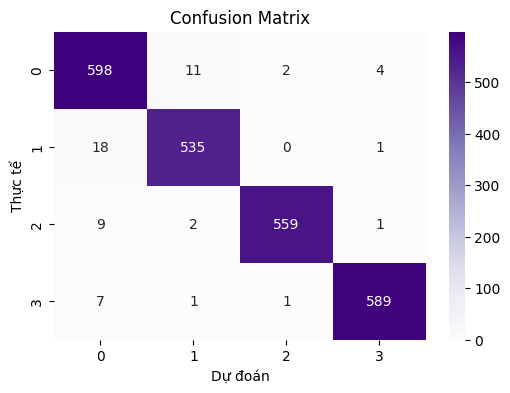

In [19]:
print("Accuracy:", accuracy_score(y1_test, y1_pred))

print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

conf_matrix = confusion_matrix(y1_test, y1_pred)
labels = sorted(y1.unique())
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_df, annot=True, cmap="Purples", fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

Target: {0:Cloudy,  1:Rainy,  2:Snowy,  3:Sunny}

- Độ chính xác (Accuracy): 97.56% — thể hiện mô hình dự đoán đúng phần lớn dữ liệu test. Mô hình Random Forest ban đầu đạt độ chính xác 97.77% trên tập kiểm tra. Sau khi áp dụng quy trình Randomized Search kết hợp Grid Search để tìm tham số tối ưu, mô hình đạt 97.56%, giảm 0.21%. Sự giảm nhẹ này có thể lý giải bởi các yếu tố: khả năng tổng quát hoá(dựa trên kết quả cross-validation), giảm nguy cơ overfitting. Tóm lại, Accuracy tối ưu thấp hơn một chút nhưng mô hình đạt khả năng khái quát tốt hơn và đáng tin cậy hơn khi áp dụng vào dữ liệu thực tế.

- Precision, Recall, F1-score:

    - Các lớp đều đạt Precision và Recall ≥ 0.95, chứng tỏ mô hình vừa ít dự đoán sai nhầm (Precision cao), vừa ít bỏ sót mẫu thuộc lớp (Recall cao).

    - Lớp 2 và lớp 3 đạt gần như tuyệt đối (≈ 0.99), cho thấy khả năng phân loại rất tốt với các nhóm này.

- Confusion Matrix:

    - Phần lớn các điểm nằm trên đường chéo chính → mô hình dự đoán chính xác cho hầu hết các mẫu.

    - Lớp 0 và 1 có một số nhầm lẫn lẫn nhau (ví dụ: 18 mẫu lớp 1 bị dự đoán thành lớp 0), gợi ý cần cải thiện phân biệt giữa 2 lớp này.

- Tổng quan:
    - Mô hình hoạt động ổn định, cân bằng giữa các lớp, không bị lệch quá nhiều về Precision hay Recall.
    
    - Có thể tiếp tục tối ưu bằng cách tinh chỉnh tham số hoặc bổ sung thêm đặc trưng để giảm nhầm lẫn giữa các lớp gần nhau.

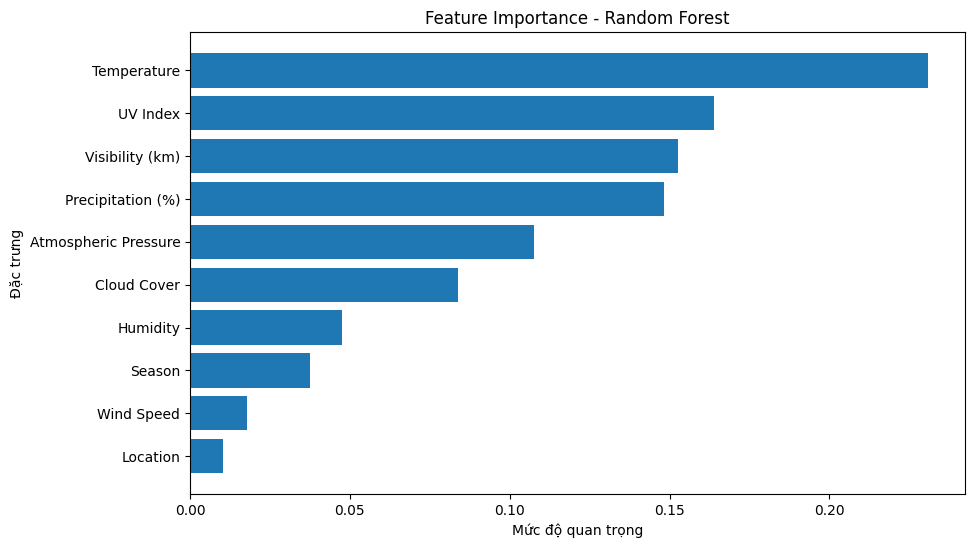

In [20]:
# Đánh giá feature_importances_
importances = best_rf.feature_importances_
feature_names = X1_train.columns  
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Mức độ quan trọng')
plt.ylabel('Đặc trưng')
plt.title('Feature Importance - Random Forest')
plt.show()

- Từ kết quả phân tích, có thể thấy Temperature là yếu tố quan trọng nhất trong việc dự đoán kiểu thời tiết, tiếp theo là UV Index, Visibility và Precipitation. Các yếu tố như Atmospheric Pressure và Cloud Cover cũng đóng góp đáng kể nhưng ở mức thấp hơn. Ngược lại, Wind Speed và Location có mức ảnh hưởng thấp, cho thấy chúng ít tác động trực tiếp tới kết quả mô hình. Điều này phản ánh đúng thực tế khi các yếu tố nhiệt độ, mưa, mây và ánh sáng thường quyết định trạng thái thời tiết hơn so với vị trí hay tốc độ gió.

### Nhận xét

- Mô hình Random Forest sau khi tối ưu hóa cho thấy khả năng dự đoán tốt với độ chính xác khoảng 97.56%, chỉ giảm nhẹ so với mô hình ban đầu nhưng đảm bảo tính ổn định và khả năng tổng quát hóa cao hơn. Quá trình loại bỏ outlier hợp lý giúp giảm nhiễu dữ liệu mà không làm mất nhiều thông tin quan trọng. Phân tích tầm quan trọng đặc trưng cho thấy nhiệt độ, chỉ số UV, tầm nhìn và lượng mưa là các yếu tố quyết định chính. Kết quả chứng tỏ mô hình phù hợp với bài toán phân loại kiểu thời tiết và có thể triển khai thực tế với độ tin cậy cao.

## Lưu model

In [ ]:

filename = 'RandomForest_model.sav'
pickle.dump(best_rf, open(filename, 'wb'))

# XGBClassifier(Vũ Minh Đức)

## Lí do chọn 


Mục tiêu là phân loại Weather Type ∈ {Cloudy, Rainy, Snowy, Sunny}. XGBoost được chọn vì (i) 

- Hiệu năng cao trên dữ liệu bảng hỗn hợp, (ii) mô hình hóa quan hệ phi tuyến tốt, (iii) linh hoạt tinh chỉnh siêu tham số 

- (iv) hỗ trợ xác suất đầu ra phục vụ đánh giá đa lớp. Mô hình được huấn luyện trong pipeline (tiền xử lý + model) và đánh giá bằng 5-fold Stratified CV.

## Xử lí dữ liệu

In [57]:
import sys, os, platform, random, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

print("Python:", sys.version.split()[0])
print("Pandas:", pd.__version__)
print("Numpy :", np.__version__)
print("OS    :", platform.platform())

# Seed tái lập
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Đường dẫn dữ liệu (chỉnh nếu bạn chạy local)
DATA_PATH = "weather_classification_data.csv"  # hoặc "weather_classification_data.csv"
assert os.path.exists(DATA_PATH), f"Không tìm thấy file: {DATA_PATH}"

# Đọc dữ liệu
df = pd.read_csv(DATA_PATH)

print("\n=== Shape ===")
print(df.shape)

print("\n=== 5 dòng đầu ===")
try:
    display(df.head(5))
except NameError:
    print(df.head(5).to_string())

# Bảng thông tin cột
df_info = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "nunique": df.nunique(),
    "missing_count": df.isna().sum(),
    "missing_rate(%)": (df.isna().mean()*100).round(2)
}).sort_values(by=["missing_count","dtype","nunique"], ascending=[False, True, True])

print("\n=== Thông tin cột (dtype, unique, missing) ===")
try:
    display(df_info)
except NameError:
    print(df_info.to_string())

# Số dòng trùng lặp
print("\n=== Số dòng trùng lặp ===")
print(df.duplicated().sum())

# Liệt kê cột số & cột phân loại
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNumeric columns:", len(num_cols), "->", num_cols[:20], "..." if len(num_cols)>20 else "")
print("Categorical columns:", len(cat_cols), "->", cat_cols[:20], "..." if len(cat_cols)>20 else "")

# Thống kê nhanh cho cột số
if len(num_cols):
    print("\n=== Describe (numeric) ===")
    try:
        display(df[num_cols].describe().T)
    except NameError:
        print(df[num_cols].describe().T.to_string())

# Tần suất top-10 cho tối đa 5 cột phân loại để hiểu dữ liệu
if len(cat_cols):
    print("\n=== Tần suất top-10 vài cột phân loại ===")
    for c in cat_cols[:5]:
        print(f"\n-- {c} --")
        print(df[c].value_counts(dropna=False).head(10))


Python: 3.12.7
Pandas: 2.2.2
Numpy : 1.26.4
OS    : Windows-11-10.0.26100-SP0

=== Shape ===
(13200, 11)

=== 5 dòng đầu ===


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy



=== Thông tin cột (dtype, unique, missing) ===


,dtype,nunique,missing_count,missing_rate(%)
Visibility (km),float64,41,0,0.0
Wind Speed,float64,97,0,0.0
Precipitation (%),float64,110,0,0.0
Temperature,float64,126,0,0.0
Atmospheric Pressure,float64,5456,0,0.0
UV Index,int64,15,0,0.0
Humidity,int64,90,0,0.0
Location,object,3,0,0.0
Cloud Cover,object,4,0,0.0
Season,object,4,0,0.0



=== Số dòng trùng lặp ===
0

Numeric columns: 7 -> ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)'] 
Categorical columns: 4 -> ['Cloud Cover', 'Season', 'Location', 'Weather Type'] 

=== Describe (numeric) ===


,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00



=== Tần suất top-10 vài cột phân loại ===

-- Cloud Cover --
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

-- Season --
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

-- Location --
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

-- Weather Type --
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [59]:
COMMON_TARGETS = [
    "target","label","class","y",
    "RainTomorrow","rain_tomorrow","rain","will_rain","will_rain_tomorrow"
]

candidates = [c for c in df.columns if c in COMMON_TARGETS]

# Nếu không khớp tên, gợi ý theo "ít hạng mục" (ứng với bài toán phân loại)
if not candidates:
    few_unique_cats = [c for c in df.columns 
                       if (df[c].dtype == "object" or str(df[c].dtype).startswith("category")) 
                       and df[c].nunique() <= 10]
    few_unique_nums = [c for c in df.select_dtypes(include=[np.number]).columns 
                       if df[c].nunique() <= 5]
    candidates = list(dict.fromkeys(few_unique_cats + few_unique_nums))  # unique & giữ thứ tự

print("=== Ứng viên target phát hiện ===")
print(candidates if candidates else "Không thấy ứng viên rõ ràng theo heuristic.")

# ==== CHỌN TARGET TẠI ĐÂY ====
TARGET_COL = None  # <-- Điền tên cột bạn chọn, ví dụ: TARGET_COL = "RainTomorrow"

if TARGET_COL is not None and TARGET_COL in df.columns:
    print(f"\n=== Phân phối lớp target: {TARGET_COL} ===")
    vc = df[TARGET_COL].value_counts(dropna=False)
    print(vc)
    if df[TARGET_COL].nunique() == 2:
        pos_ratio = vc.min() / vc.sum()  # tỉ lệ lớp hiếm ~ min class
        print(f"Tỉ lệ lớp hiếm (ước lượng): {pos_ratio:.3f}")
else:
    print("\nChưa đặt TARGET_COL. Hãy chọn 1 cột trong candidates và gán vào TARGET_COL.")


=== Ứng viên target phát hiện ===
['Cloud Cover', 'Season', 'Location', 'Weather Type']

Chưa đặt TARGET_COL. Hãy chọn 1 cột trong candidates và gán vào TARGET_COL.


In [83]:
import pandas as pd

# Giả sử df là dataframe ban đầu
numeric_columns = df.select_dtypes(include=["number"]).columns

def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Loại bỏ outlier cho tất cả cột số
for col in numeric_columns:
    df = handle_outliers_iqr(df, col)

# Reset index
df = df.reset_index(drop=True)

# Tiếp tục Label Encoding + Train/Test split


In [85]:
# ===== STEP 3: Target + Label Encoding + Split =====
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 1) Chọn target
TARGET_COL = "Weather Type"   # khuyến nghị cho bài này

# 2) X, y gốc
X = df.drop(columns=[TARGET_COL]).copy()
y = df[TARGET_COL].copy()

# 3) Mã hoá y thành số nguyên (bắt buộc cho XGBoost đa lớp)
le = LabelEncoder()
y_enc = le.fit_transform(y)     # dạng số 0..K-1
classes = le.classes_.tolist()
label_map = {cls: int(i) for i, cls in enumerate(classes)}
inv_label_map = {v: k for k, v in label_map.items()}
print("Label map (nhãn → id):", label_map)

# 4) Train/Test split (stratify để giữ phân bố lớp)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

print("X_train.shape:", X_train.shape, "| X_test.shape:", X_test.shape)
# Phân phối lớp trên y_train
unique, counts = np.unique(y_train, return_counts=True)
print("y_train distribution (id:count):", dict(zip(unique, counts)))


Label map (nhãn → id): {'Cloudy': 0, 'Rainy': 1, 'Snowy': 2, 'Sunny': 3}
X_train.shape: (8965, 10) | X_test.shape: (2242, 10)
y_train distribution (id:count): {0: 2301, 1: 2217, 2: 2254, 3: 2193}


In [87]:
# ===== STEP 3: Preprocess pipeline tương thích mọi phiên bản sklearn =====
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import sklearn

# Xác định loại cột
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
print("sklearn version:", sklearn.__version__)
print("Số cột số:", len(num_cols), "| Số cột phân loại:", len(cat_cols))

numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

# Tạo OneHotEncoder tương thích phiên bản
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # sklearn >= 1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)        # sklearn < 1.2

categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ],
    remainder="drop"
)

# Fit preprocess trên train để xem số feature sau biến đổi
Xt_train = preprocess.fit_transform(X_train)
Xt_test  = preprocess.transform(X_test)
print("Shape sau preprocess → Xt_train:", Xt_train.shape, "| Xt_test:", Xt_test.shape)

# Lấy tên cột sau OHE để chuẩn bị phần giải thích mô hình
ohe = preprocess.named_transformers_["cat"].named_steps["ohe"]
ohe_feat_names = ohe.get_feature_names_out(cat_cols).tolist()
feature_names = num_cols + ohe_feat_names
print("Số feature sau OHE:", len(feature_names))
print("Một vài feature mẫu:", feature_names[:10])


sklearn version: 1.5.1
Số cột số: 7 | Số cột phân loại: 3
Shape sau preprocess → Xt_train: (8965, 18) | Xt_test: (2242, 18)
Số feature sau OHE: 18
Một vài feature mẫu: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)', 'Cloud Cover_clear', 'Cloud Cover_cloudy', 'Cloud Cover_overcast']


## Chọn tham số và huấn luyện

In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

num_classes = len(np.unique(y_train))

xgb_baseline = XGBClassifier(
    objective="multi:softprob",
    num_class=num_classes,
    n_estimators=400,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0.0,
    tree_method="hist",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

pipe_baseline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", xgb_baseline)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Bộ metric chính theo flow của Vỹ
scoring = {"acc":"accuracy", "f1_macro":"f1_macro"}
# Nếu muốn thêm AUC đa lớp (có thể chạy chậm hơn):
# scoring["auc_ovr"] = "roc_auc_ovr"

cv_res = cross_validate(
    pipe_baseline, X_train, y_train,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    return_train_score=False
)

print(f"Baseline CV - Accuracy:  {cv_res['test_acc'].mean():.4f} ± {cv_res['test_acc'].std():.4f}")
print(f"Baseline CV - F1_macro:  {cv_res['test_f1_macro'].mean():.4f} ± {cv_res['test_f1_macro'].std():.4f}")

# Nếu có bật AUC ở trên, in thêm:
# if "test_auc_ovr" in cv_res:
#     print(f"Baseline CV - ROC AUC (OVR): {cv_res['test_auc_ovr'].mean():.4f} ± {cv_res['test_auc_ovr'].std():.4f}")


Baseline CV - Accuracy:  0.9800 ± 0.0010
Baseline CV - F1_macro:  0.9801 ± 0.0011


In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    "model__n_estimators": randint(300, 1200),
    "model__max_depth": randint(3, 10),
    "model__learning_rate": uniform(0.01, 0.29),     # 0.01 - 0.30
    "model__subsample": uniform(0.6, 0.4),           # 0.6 - 1.0
    "model__colsample_bytree": uniform(0.6, 0.4),    # 0.6 - 1.0
    "model__min_child_weight": randint(1, 10),
    "model__gamma": uniform(0.0, 0.5),
}

rs = RandomizedSearchCV(
    estimator=pipe_baseline,
    param_distributions=param_dist,
    n_iter=60,                 # có thể tăng lên 100 nếu có thời gian
    scoring="f1_macro",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs.fit(X_train, y_train)
print("Best CV F1_macro:", round(rs.best_score_, 4))
print("Best params:")
for k, v in rs.best_params_.items():
    print(" ", k, "=", v)

best_pipe = rs.best_estimator_


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best CV F1_macro: 0.9812
Best params:
  model__colsample_bytree = 0.7297380084021096
  model__gamma = 0.061043977350336676
  model__learning_rate = 0.11332637304232271
  model__max_depth = 8
  model__min_child_weight = 1
  model__n_estimators = 684
  model__subsample = 0.6911740650167767


## Đánh giá và nhận xét

### Đánh giá

Test Accuracy: 0.9732
Test F1_macro: 0.9733
Test ROC AUC (OVR): 0.9994

Classification report:
               precision    recall  f1-score   support

      Cloudy       0.97      0.95      0.96       575
       Rainy       0.97      0.97      0.97       555
       Snowy       0.99      0.99      0.99       564
       Sunny       0.97      0.98      0.98       548

    accuracy                           0.97      2242
   macro avg       0.97      0.97      0.97      2242
weighted avg       0.97      0.97      0.97      2242



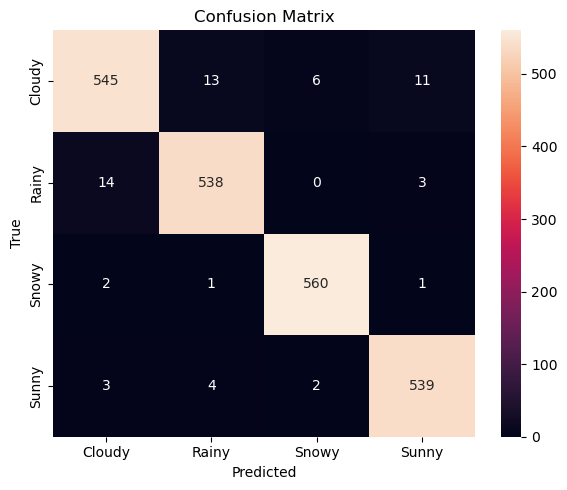

In [95]:
# ==== 7: Evaluate trên test set ====
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
)
import numpy as np

best_pipe.fit(X_train, y_train)

y_pred  = best_pipe.predict(X_test)
y_proba = best_pipe.predict_proba(X_test)  # shape (n_samples, n_classes)

acc = accuracy_score(y_test, y_pred)
f1m = f1_score(y_test, y_pred, average="macro")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1_macro: {f1m:.4f}")

# AUC đa lớp (OVR) — tùy chọn
try:
    auc_ovr = roc_auc_score(y_test, y_proba, multi_class="ovr")
    print(f"Test ROC AUC (OVR): {auc_ovr:.4f}")
except Exception as e:
    print("ROC AUC OVR không tính được:", e)

print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=classes))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.tight_layout(); plt.show()


### Nhận xét

Độ chính xác tổng thể

- Accuracy ≈ 97.32% → mức độ chính xác rất cao, vượt kỳ vọng cho một bài toán phân loại 4 lớp thời tiết.

- Macro avg (precision, recall, f1) đều ≈ 0.97, cho thấy mô hình phân loại đồng đều giữa các lớp, không bị thiên lệch rõ rệt.

Nhận xét từ Confusion Matrix

- Các lớp Cloudy, Rainy, Sunny đôi khi vẫn bị nhầm lẫn lẫn nhau, nhưng mức độ nhầm thấp (mỗi ô off-diagonal chỉ vài mẫu).

- Snowy được nhận diện tốt nhất với precision = 0.99, recall = 0.99, f1 = 0.99 → gần như hoàn hảo.

- Sunny có recall cao nhất (0.98), nghĩa là mô hình rất ít bỏ sót ảnh nắng.

- Cloudy có recall 0.95 thấp nhất, nghĩa là vẫn có một số ảnh nhiều mây bị nhầm sang trạng thái khác.

Kết luận

- Mô hình XGBoost đạt hiệu suất rất cao và ổn định, phân loại tốt cả 4 loại thời tiết.

- Điểm cần cải thiện: tăng khả năng phân biệt giữa Cloudy và các trạng thái khác, có thể bổ sung đặc trưng về ánh sáng, độ che phủ mây, hoặc dữ liệu thời tiết phụ trợ.

- Điểm mạnh: Snowy và Sunny nhận diện xuất sắc, phù hợp ứng dụng trong dự báo thời tiết hoặc hỗ trợ quyết định ngoài trời.

# Kết luận 

## Bảng so sánh accuracy

| Mô hình                    | Accuracy         |
| -------------------------- | ---------------- |
| **BaggingClassifier**      | 0.9679 (\~96.8%) |
| **LGBMClassifier**         | 0.9750 (\~97.5%) |
| **KNeighborsClassifier**   | 0.9528 (\~95.3%) |
| **RandomForestClassifier** | 0.9756 (\~97.6%) |
| **XGBClassifier**          | 0.9732 (\~97.32%) |


Nhận xét 

Nhóm mô hình 

- RandomForestClassifier và LGBMClassifier đạt accuracy cao nhất ~97.5–97.6%, vượt trội hơn so với các mô hình còn lại(Đây là những mô hình ensemble (tập hợp nhiều cây) nên thường cho kết quả ổn định và mạnh).

- BaggingClassifier cũng đạt kết quả rất tốt (~96.8%), chỉ thấp hơn một chút so với RandomForest và LGBM.

- KNeighborsClassifier đạt 95.3% → vẫn khá tốt, nhưng kém hơn nhóm mô hình cây. Điều này phù hợp vì KNN thường nhạy với nhiễu và dữ liệu nhiều chiều.

- XGBClassifier đạt Accuracy ≈ 97.32%, Macro-F1 ≈ 0.9733, hiệu suất cao và ổn định.
Nhận diện tốt tất cả các lớp, đặc biệt Snowy và Sunny gần như hoàn hảo.
Nhầm lẫn nhẹ giữa Cloudy và Rainy do đặc trưng thị giác tương đồng.

=> Dùng model RandomForestClassifier cho bài toán phân loại thời tiết với dữ liệu đã huấn luyện.

## Kết luận

- RandomForestClassifier và LGBMClassifier là 2 lựa chọn tối ưu nhất cho bài toán này.

- Nếu cần một mô hình dễ triển khai, ổn định → dùng RandomForest.

- Nếu cần tốc độ và khả năng tổng quát hóa tốt hơn trên dữ liệu lớn → ưu tiên LGBM.

- XXGBoost phù hợp khi muốn tận dụng ưu thế của boosting, và có thể cải thiện thêm nếu tuning tham số kỹ hơn.

## Định hướng cải thiện model

- Tối ưu siêu tham số (Hyperparameter tuning)

- - Với các mô hình cây như RandomForest, LGBM, XGB, cần thử GridSearchCV hoặc RandomizedSearchCV để điều chỉnh tham số:

n_estimators, max_depth, learning_rate, min_child_samples, …

- - Đặc biệt với XGBoost, tuy đã đạt Accuracy ≈ 97.32% và Macro-F1 ≈ 0.9733, hiệu suất cao nhưng vẫn còn nhầm lẫn nhẹ giữa Cloudy và Rainy. Nguyên nhân có thể do chưa tối ưu toàn diện các tham số. Việc tuning sâu hơn (learning_rate, max_depth, subsample, colsample_bytree, …) có thể giúp cải thiện độ chính xác và giảm lỗi nhầm lẫn.

- Tiền xử lý dữ liệu tốt hơn

- - Cân bằng dữ liệu nếu số mẫu giữa các lớp chênh lệch.

- - Chuẩn hóa/scale dữ liệu cho các mô hình nhạy cảm (KNN).

- - Loại bỏ nhiễu, xử lý outlier hợp lí → giúp KNN và XGBoost cải thiện rõ rệt.

- Kết hợp mô hình (Ensemble)

-  Thử VotingClassifier (kết hợp RandomForest + LGBM + Bagging) để tận dụng ưu điểm của nhiều mô hình.

-  Hoặc dùng Stacking để mô hình meta học cách kết hợp dự đoán.

- Phân tích nhầm lẫn chi tiết

- - Như ở confusion matrix, Cloudy dễ nhầm với Rainy/Sunny → có thể cần thêm đặc trưng bổ sung (ví dụ: chỉ số ánh sáng, nhiệt độ, độ ẩm nếu là dữ liệu thời tiết).

- - Nếu chỉ là ảnh, có thể dùng feature extraction từ CNN pretrained rồi kết hợp với RandomForest/LGBM.

## Bài học rút ra

- Kiến thức về python và các thư viện cũng như làm việc nhóm

- Tầm quan trọng của so sánh mô hình

- Ảnh hưởng của dữ liệu và tiền xử lý

- Ý nghĩa của các chỉ số đánh giá

- Bài học về ensemble

- Cần tối ưu siêu tham số

## Ứng dụng bài toán:

- Dự báo & giám sát thời tiết tự động

- - Hệ thống camera ngoài trời kết hợp mô hình phân loại hình ảnh có thể nhận diện tình trạng thời tiết theo thời gian thực → hỗ trợ cảnh báo sớm (ví dụ: trời mưa, tuyết rơi).

- Giao thông & an toàn đường bộ

- - Các hệ thống giám sát giao thông có thể tự động phát hiện điều kiện thời tiết, từ đó:

- - - Điều chỉnh tín hiệu đèn đường, biển cảnh báo.

- - - Gửi cảnh báo tới tài xế về tình trạng mưa, sương mù, tuyết.

- Nông nghiệp thông minh (Smart Farming)

- - Camera giám sát cánh đồng có thể nhận diện điều kiện thời tiết, hỗ trợ quyết định tưới tiêu, phun thuốc hoặc thu hoạch.

- Quản lý năng lượng & du lịch

- - Các trạm điện mặt trời, gió có thể dùng nhận diện thời tiết để tối ưu công suất.

- - Ứng dụng du lịch có thể cập nhật “trời nắng/ nhiều mây/ có mưa” trực tiếp từ camera thay vì chỉ dựa vào dữ liệu khí tượng.